# XOR

* 하나의 히든 레이어를 도입한다.
* input layer는 2개의 노드 + 1개의 바이어스
* hidden layer는 3개의 노드 + 1개의 바이어스
* output은 하나의 노드로 한다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
X = np.array([[0,0,1],[1,0,1],[0,1,1],[1,1,1]]) # 세번째 항은 bias
Y = np.array([0,1,1,0])

In [3]:
def sigmoid(x):
    y=1/(1+np.exp(-x))
    return y

In [4]:
X

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [5]:
w=np.random.randn(4,3)
w

array([[-0.61403314,  0.30727341, -0.10230651],
       [ 1.1233892 ,  1.68953983,  0.41683191],
       [-0.4812932 ,  0.56373919, -1.53503577],
       [-0.97146384,  0.22745827,  0.82476412]])

In [6]:
omega=np.random.randn(4,)
omega

array([ 0.13527898,  0.63426288,  0.11940555, -1.80431024])

In [7]:
eta=1

In [8]:
deltah=[0,0,0,0]
epochs=30
error_sum=[]
for epoch in range (epochs+1):
    for n in range(1000):
        E=0
        for i in range(4):
            neth = np.dot(w,X[i])
            h=sigmoid(neth)
            neto = np.dot(omega,h)
            ohat = sigmoid(neto)
            E = E + (ohat-Y[i])**2
            deltao = (ohat-Y[i]) * ohat * (1-ohat)
            for j in range(4):
                deltah[j] = deltao * omega[j] * sigmoid(neth[j]) * (1-sigmoid(neth[j]))
                omega[j] = omega[j] - eta * deltao * h[j]
                for k in range(3):
                    w[j][k] = w[j][k] - eta * deltah[j] * X[i][k]
    error_sum.append(E)

Text(0, 0.5, 'error_sum')

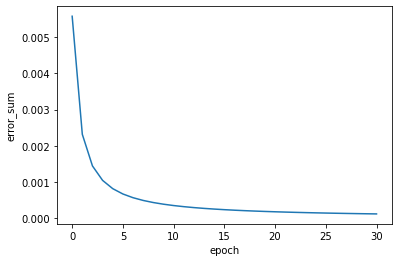

In [9]:
plt.plot(error_sum)
plt.xlabel("epoch")
plt.ylabel("error_sum")

In [10]:
w,omega

(array([[-5.39120504,  3.21795919, -1.2781104 ],
        [ 4.69584273,  4.69610788, -0.97339317],
        [-5.2930124 ,  3.49098982, -1.57098984],
        [-5.34180596,  7.06317668,  2.09960016]]),
 array([  6.44340522,   5.54101546,   6.30973923, -11.16119023]))

In [11]:
t=[]
for i in range(4):
    neth = np.dot(w,X[i])
    h=sigmoid(neth)
    neto = np.dot(omega,h)
    ohat = sigmoid(neto)
    t.append(ohat)
np.array(t)

array([0.00264049, 0.99334182, 0.99544472, 0.00686129])

예측값과 타겟값이 비슷해졌다.